In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import os,time
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

In [5]:
from ipynb.fs.full.func_plot_histo import plot_projections

## Generate neutrinos fluxes

In [6]:
# 1 PeV = 10**6 GeV
#write function to generate plots 

mass = 1e6 #(1 PeV)
process = 'ann' #annihilation default

#info of neutrino spectrum binning. 
Emin         = 1
Emax        = mass

nodes        = 300 #len(mass_range)
bins         = 300

#info of oscillation parameters
theta_12=33.82
theta_13=8.6
theta_23=48.6
delta_m_12=7.39e-5
delta_m_13=2.528e-3
delta = 221.


#linear space of outcoming energies 
logscale = True #default
#include interactions
interactions = True #default

color = ['limegreen', 'purple', 'mediumblue', 'darkorange','deeppink','darkturquoise']

In [7]:
Flux_ee = propa.NuFlux('nuenue',mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

In [8]:
Flux_tautau = propa.NuFlux('nutaunutau',mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

In [9]:
Flux_mumu = propa.NuFlux('numunumu',mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b16_agss09.dat')

In [10]:
channels = ['ee', 'tautau', 'mumu', 'WW', 'bb', 'uu']
list_flux, list_flux_halo = [],[]

In [11]:
for i in channels:
    list_flux.append(propa.NuFlux(i,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                     process=process,logscale=logscale,interactions=interactions,
                     theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathSunModel='../charon/models/struct_b1'))
for j in range(len(list_flux)):
    list_flux_halo.append(list_flux[j].iniFlux('Halo'))

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


In [12]:
flux_ini_Halo_ee = Flux_ee.iniFlux('Halo')
flux_ini_Halo_mu = Flux_mumu.iniFlux('Halo')
flux_ini_Halo_tau = Flux_tautau.iniFlux('Halo')

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


First we can plot the $\nu$ flux at production. (flavors: nu_e, nu_e_bar, nu_mu, nu_mu_bar, nu_tau, nu_tau_bar) 

In [13]:
mass_range = Flux_ee.iniE()
print(len(mass_range))

300


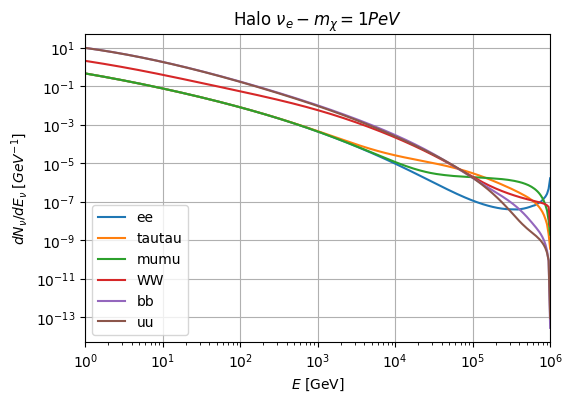

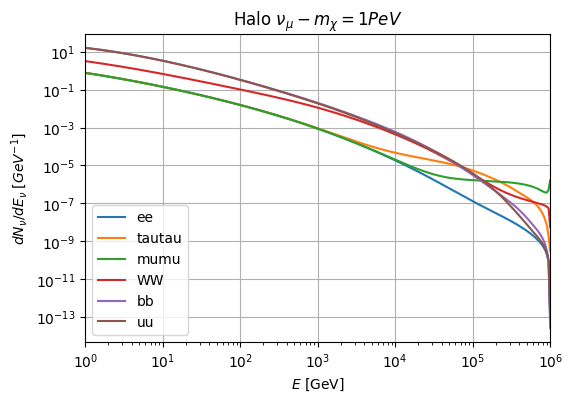

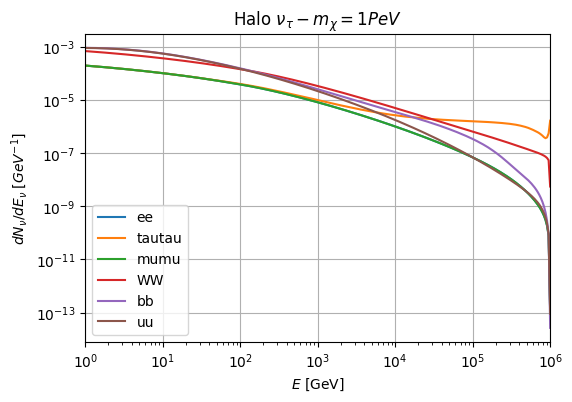

In [40]:
plt.figure(figsize = (6,4))
plt.title(r'Halo $\nu_e - m_{\chi} = 1PeV$')
plt.yscale('log')
plt.semilogx()
plt.xlim(Emin,Emax)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE_\nu\;[GeV^{-1}]$")
for i in range(len(list_flux_halo)):
    plt.plot(mass_range, list_flux_halo[i]['nu_e']/mass, label = channels[i])
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Halo $\nu_{\mu} - m_{\chi} = 1PeV$')
plt.yscale('log')
plt.semilogx()
plt.xlim(Emin,Emax)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE_\nu\;[GeV^{-1}]$")
for i in range(len(list_flux_halo)):
    plt.plot(mass_range, list_flux_halo[i]['nu_mu']/mass, label = channels[i])
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Halo $\nu_{\tau} -  m_{\chi} = 1PeV$')
plt.yscale('log')
plt.semilogx()
plt.xlim(Emin,Emax)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE_\nu\;[GeV^{-1}]$")
for i in range(len(list_flux_halo)):
    plt.plot(mass_range, list_flux_halo[i]['nu_tau']/mass, label = channels[i])
plt.legend()

### Icecube energy range : 10 GeV to PeV

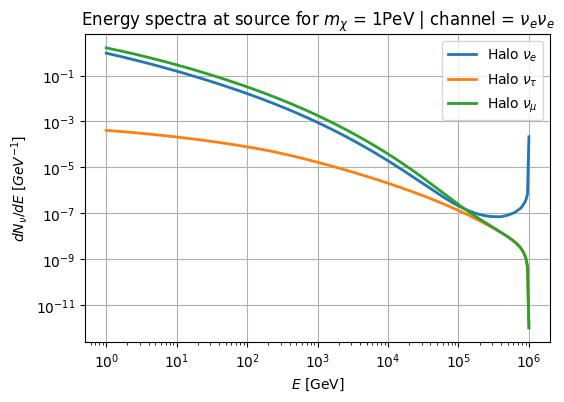

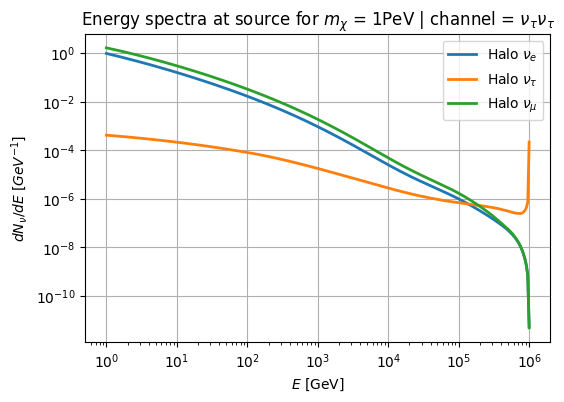

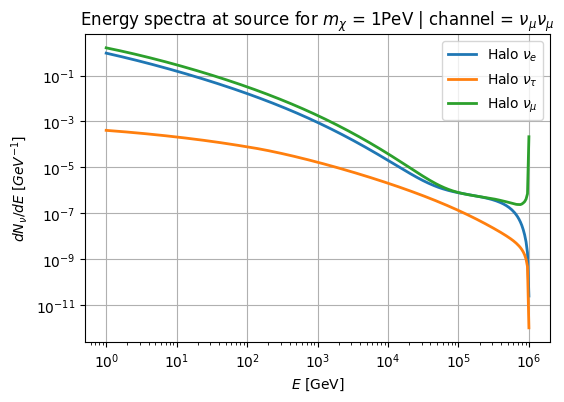

In [15]:
plt.figure(figsize = (6,4))
plt.title(r'Energy spectra at source for $m_{\chi}$ = 1PeV | channel = $\nu_{e}\nu_{e}$')
plt.plot(mass_range,flux_ini_Halo_ee['nu_e']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(mass_range,flux_ini_Halo_ee['nu_tau']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\tau$')
plt.plot(mass_range,flux_ini_Halo_ee['nu_mu']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE\;[GeV^{-1}]$")
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Energy spectra at source for $m_{\chi}$ = 1PeV | channel = $\nu_{\tau}\nu_{\tau}$')
plt.plot(mass_range,flux_ini_Halo_tau['nu_e']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(mass_range,flux_ini_Halo_tau['nu_tau']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\tau$')
plt.plot(mass_range,flux_ini_Halo_tau['nu_mu']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE\;[GeV^{-1}]$")
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Energy spectra at source for $m_{\chi}$ = 1PeV | channel = $\nu_{\mu}\nu_{\mu}$')
plt.plot(mass_range,flux_ini_Halo_mu['nu_e']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(mass_range,flux_ini_Halo_mu['nu_tau']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\tau$')
plt.plot(mass_range,flux_ini_Halo_mu['nu_mu']/mass,linewidth=2.0,label=r'${\rm{Halo}}\;\nu_\mu$')
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE\;[GeV^{-1}]$")
plt.legend()

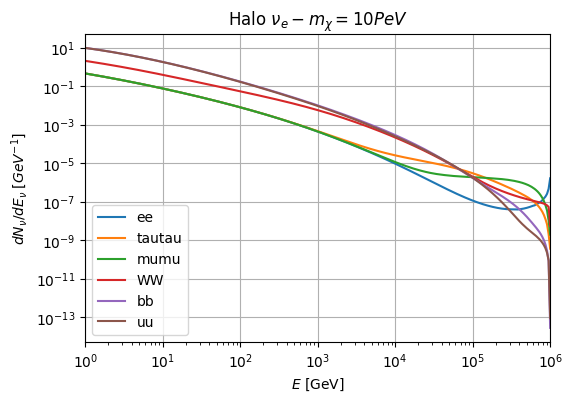

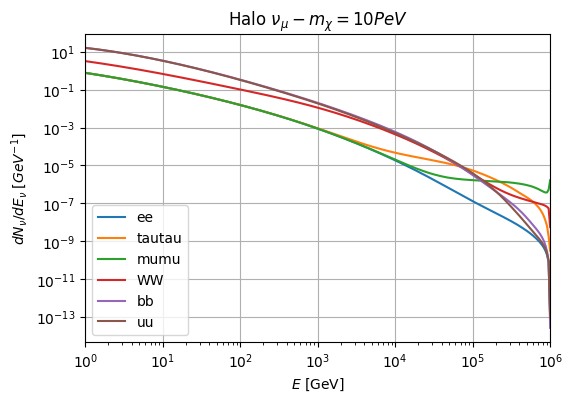

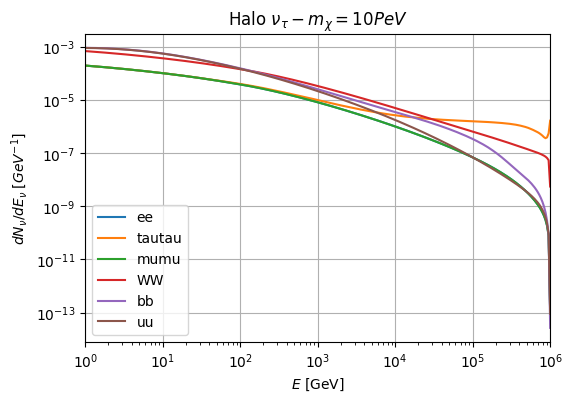

In [16]:
plt.figure(figsize = (6,4))
plt.title(r'Halo $\nu_e - m_{\chi} = 10PeV$')
plt.yscale('log')
plt.semilogx()
plt.xlim(Emin,Emax)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE_\nu\;[GeV^{-1}]$")
for i in range(len(list_flux_halo)):
    plt.plot(mass_range, list_flux_halo[i]['nu_e']/mass, label = channels[i])
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Halo $\nu_{\mu} - m_{\chi} = 10PeV$')
plt.yscale('log')
plt.semilogx()
plt.xlim(Emin,Emax)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE_\nu\;[GeV^{-1}]$")
for i in range(len(list_flux_halo)):
    plt.plot(mass_range, list_flux_halo[i]['nu_mu']/mass, label = channels[i])
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Halo $\nu_{\tau} -  m_{\chi} = 10PeV$')
plt.yscale('log')
plt.semilogx()
plt.xlim(Emin,Emax)
plt.grid()
plt.xlabel(r"$E$ [GeV]")
plt.ylabel(r"$dN_\nu/dE_\nu\;[GeV^{-1}]$")
for i in range(len(list_flux_halo)):
    plt.plot(mass_range, list_flux_halo[i]['nu_tau']/mass, label = channels[i])
plt.legend()

Propagate the flux.

The output of propagated flux is a numpy array with columns ['Energy'], ['nu_e'], ['nu_e_bar'], ['nu_mu'], ['nu_mu_bar'], ['nu_tau'], ['nu_tau_bar'], ['zenith'].

The default is that when DM mass is smaller than 500 GeV the initial flux is without EW correction and when DM mass is larger than 500 GeV the initial flux has EW correction included.

Detector depth is not included!

### Oscillations

In [17]:
Flux_osc_nue = Flux_ee.Halo('detector',zenith=np.deg2rad(-29.00781+90))
Flux_osc_numu = Flux_mumu.Halo('detector',zenith=np.deg2rad(-29.00781+90))
Flux_osc_nutau= Flux_tautau.Halo('detector',zenith=np.deg2rad(-29.00781+90))

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


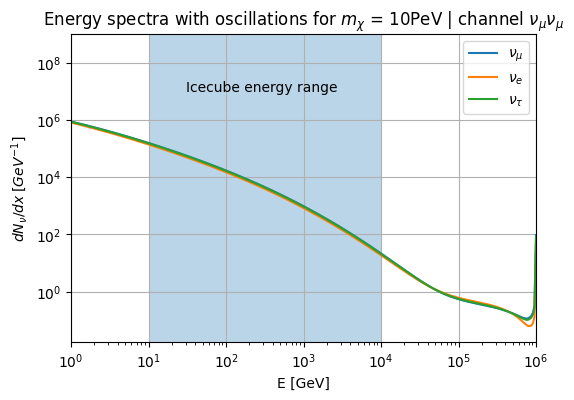

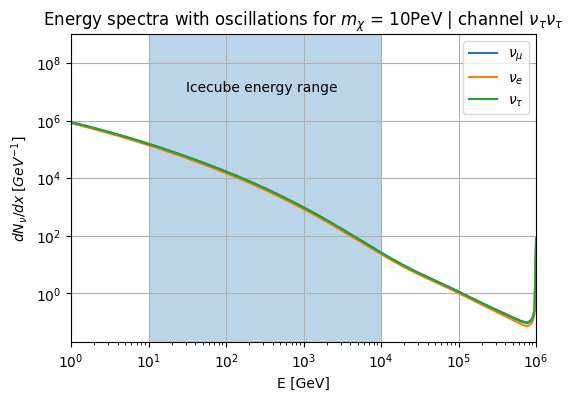

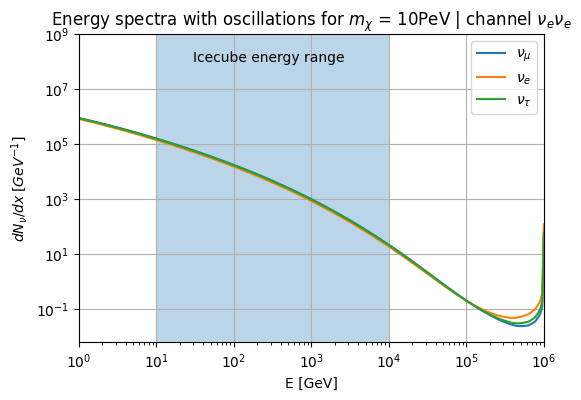

In [18]:
plt.figure(figsize = (6,4))
plt.title(r'Energy spectra with oscillations for $m_{\chi}$ = 10PeV | channel $\nu_{\mu}\nu_{\mu}$')
plt.plot(Flux_osc_numu['Energy'],Flux_osc_numu['nu_mu'],label=r'$\nu_{\mu}$')
plt.plot(Flux_osc_numu['Energy'],Flux_osc_numu['nu_e'],label=r'$\nu_e$')
plt.plot(Flux_osc_numu['Energy'],Flux_osc_numu['nu_tau'],label=r'$\nu_{\tau}$')
plt.fill_betweenx([0,10**10],[10],[10**4], alpha = 0.3)
plt.text(30,10**7,'Icecube energy range',fontsize=10.0)
plt.yscale('log')
plt.xlim(1,Emax)
plt.ylim(top=10**9)
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel("E [GeV]")
plt.ylabel(r"$dN_\nu/dx\;[GeV^{-1}]$")
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Energy spectra with oscillations for $m_{\chi}$ = 10PeV | channel $\nu_{\tau}\nu_{\tau}$')
plt.plot(Flux_osc_nutau['Energy'],Flux_osc_nutau['nu_mu'],label=r'$\nu_{\mu}$')
plt.plot(Flux_osc_nutau['Energy'],Flux_osc_nutau['nu_e'],label=r'$\nu_e$')
plt.plot(Flux_osc_nutau['Energy'],Flux_osc_nutau['nu_tau'],label=r'$\nu_{\tau}$')
plt.fill_betweenx([0,10**10],[10],[10**4], alpha = 0.3)
plt.text(30,10**7,'Icecube energy range',fontsize=10.0)
plt.yscale('log')
plt.xlim(1,Emax)
plt.ylim(top=10**9)
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel("E [GeV]")
plt.ylabel(r"$dN_\nu/dx\;[GeV^{-1}]$")
plt.legend()

plt.figure(figsize = (6,4))
plt.title(r'Energy spectra with oscillations for $m_{\chi}$ = 10PeV | channel $\nu_{e}\nu_{e}$')
plt.plot(Flux_osc_nue['Energy'],Flux_osc_nue['nu_mu'],label=r'$\nu_{\mu}$')
plt.plot(Flux_osc_nue['Energy'],Flux_osc_nue['nu_e'],label=r'$\nu_e$')
plt.plot(Flux_osc_nue['Energy'],Flux_osc_nue['nu_tau'],label=r'$\nu_{\tau}$')
plt.fill_betweenx([0,10**10],[10],[10**4], alpha = 0.3)
plt.text(30,10**8,'Icecube energy range',fontsize=10.0)
plt.yscale('log')
plt.xlim(1,Emax)
plt.ylim(top=10**9)
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel("E [GeV]")
plt.ylabel(r"$dN_\nu/dx\;[GeV^{-1}]$")
plt.legend()

test for 10 PeV
HDM spectra paper

In [19]:
from charon import profile

In [20]:
R       = 100.  #maximum of the line of sight in kpc 
d       = 8     #distance from Earth to the Galactic center in kpc
theta   = 0.    #angle between the line connecting the Earth and the Galactic Center and the line of sight in radian.
r = np.logspace(-4,2,100)
theta = np.linspace(0.,np.pi,300) #bin centers but have to use bin edges (limits of bin)
pros   = [profile.NFW,profile.Burkert,profile.Einasto,profile.Isothermal,profile.Zhao] 
labels = ['NFW','Burkert','Einasto','Isothermal','Moore']
J      = profile.J(pros[1],R,d,process)
Jtheta_NFW = [J.Jtheta(j) for j in theta]

## Multiplying J-factor & flux

J-factor = array with 1000 values in it
<br>
Flux = array where each element is a list (1000 elements)
- Multiplying each list of the flux with the correspond J-factor element 

In [21]:
Transpose_flux_nue_nue = Flux_osc_nue['nu_e'][:,None] 
Transpose_flux_nue_numu = Flux_osc_nue['nu_mu'][:,None]
Transpose_flux_nue_nutau = Flux_osc_nue['nu_tau'][:,None]

Flux_times_J_nue_nue = Transpose_flux_nue_nue*Jtheta_NFW
Flux_times_J_nue_numu = Transpose_flux_nue_numu*Jtheta_NFW
Flux_times_J_nue_nutau = Transpose_flux_nue_nutau*Jtheta_NFW

In [22]:
Transpose_flux_numu_nue = Flux_osc_numu['nu_e'][:,None] 
Transpose_flux_numu_numu = Flux_osc_numu['nu_mu'][:,None] 
Transpose_flux_numu_nutau = Flux_osc_numu['nu_tau'][:,None]

Flux_times_J_numu_nue = Transpose_flux_numu_nue*Jtheta_NFW
Flux_times_J_numu_numu = Transpose_flux_numu_numu*Jtheta_NFW
Flux_times_J_numu_nutau = Transpose_flux_numu_nutau*Jtheta_NFW

In [23]:
Transpose_flux_nutau_nue = Flux_osc_nutau['nu_e'][:,None]
Transpose_flux_nutau_numu = Flux_osc_nutau['nu_mu'][:,None]
Transpose_flux_nutau_nutau = Flux_osc_nutau['nu_tau'][:,None]

Flux_times_J_nutau_nue = Transpose_flux_nutau_nue*Jtheta_NFW
Flux_times_J_nutau_numu = Transpose_flux_nutau_numu*Jtheta_NFW
Flux_times_J_nutau_nutau = Transpose_flux_nutau_nutau*Jtheta_NFW

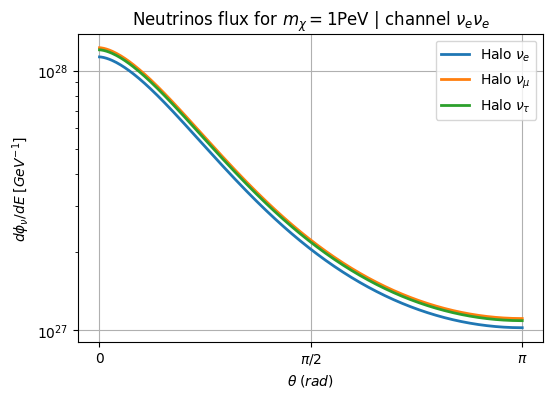

In [24]:
plt.figure(figsize = (6,4))
plt.title(r'Neutrinos flux for $m_{\chi} = 1$PeV | channel $\nu_{e}\nu_{e}$')
plt.plot(theta,Flux_times_J_nue_nue[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(theta,Flux_times_J_nue_numu[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\mu}$')
plt.plot(theta,Flux_times_J_nue_nutau[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\tau}$')
plt.yscale('log')
plt.grid()
plt.xlabel(r"$\theta \; (rad)$")
plt.xticks(ticks=[0,np.pi/2,np.pi],labels=['$0$','$\pi/2$','$\pi$'])
plt.ylabel(r"$d\phi_\nu/dE\;[GeV^{-1}]$")
plt.legend()

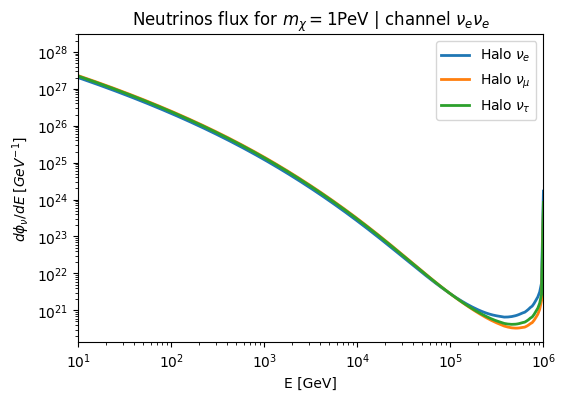

In [25]:
plt.figure(figsize = (6,4))
plt.title(r'Neutrinos flux for $m_{\chi} = 1$PeV | channel $\nu_{e}\nu_{e}$')
plt.plot(mass_range,Flux_times_J_nue_nue[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(mass_range,Flux_times_J_nue_numu[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\mu}$')
plt.plot(mass_range,Flux_times_J_nue_nutau[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\tau}$')
plt.yscale('log')
plt.grid()
plt.xlim(10,Emax)
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel("E [GeV]")
plt.ylabel(r"$d\phi_\nu/dE\;[GeV^{-1}]$")
plt.legend()

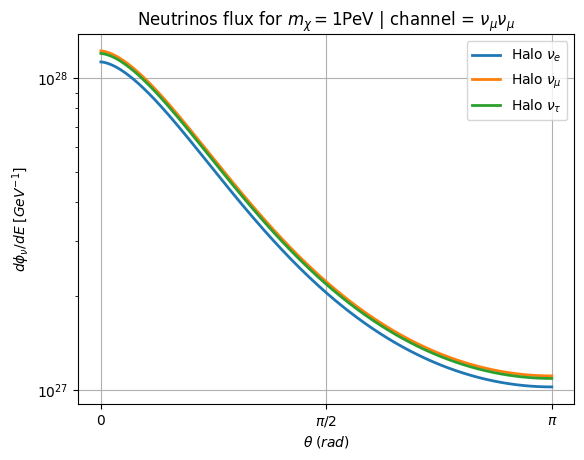

In [26]:
plt.title(r'Neutrinos flux for $m_{\chi} = 1$PeV | channel = $\nu_{\mu}\nu_{\mu}$')
plt.plot(theta,Flux_times_J_numu_nue[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(theta,Flux_times_J_numu_numu[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\mu}$')
plt.plot(theta,Flux_times_J_numu_nutau[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\tau}$')
plt.yscale('log')
plt.grid()
plt.xlabel(r"$\theta \; (rad)$")
plt.xticks(ticks=[0,np.pi/2,np.pi],labels=['$0$','$\pi/2$','$\pi$'])
plt.ylabel(r"$d\phi_\nu/dE\;[GeV^{-1}]$")
plt.legend()

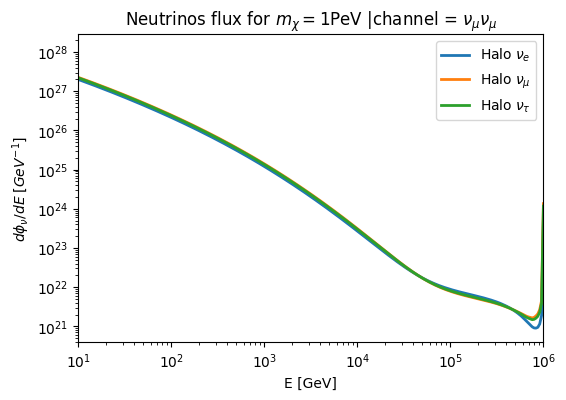

In [27]:
plt.figure(figsize = (6,4))
plt.title(r'Neutrinos flux for $m_{\chi} = 1$PeV |channel = $\nu_{\mu}\nu_{\mu}$')
plt.plot(mass_range,Flux_times_J_numu_nue[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(mass_range,Flux_times_J_numu_numu[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\mu}$')
plt.plot(mass_range,Flux_times_J_numu_nutau[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\tau}$')
plt.yscale('log')
plt.grid()
plt.xlim(10,Emax)
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel("E [GeV]")
plt.ylabel(r"$d\phi_\nu/dE\;[GeV^{-1}]$")
plt.legend()

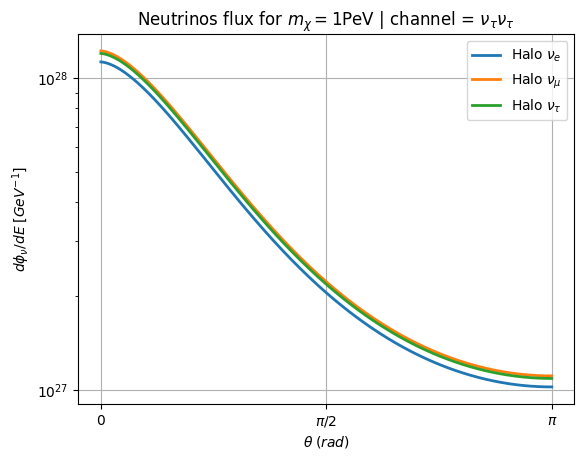

In [28]:
plt.title(r'Neutrinos flux for $m_{\chi} = 1$PeV | channel = $\nu_{\tau}\nu_{\tau}$')
plt.plot(theta,Flux_times_J_nutau_nue[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(theta,Flux_times_J_nutau_numu[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\mu}$')
plt.plot(theta,Flux_times_J_nutau_nutau[1,:],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\tau}$')
plt.yscale('log')
plt.grid()
plt.xlabel(r"$\theta \; (rad)$")
plt.xticks(ticks=[0,np.pi/2,np.pi],labels=['$0$','$\pi/2$','$\pi$'])
plt.ylabel(r"$d\phi_\nu/dE\;[GeV^{-1}]$")
plt.legend()

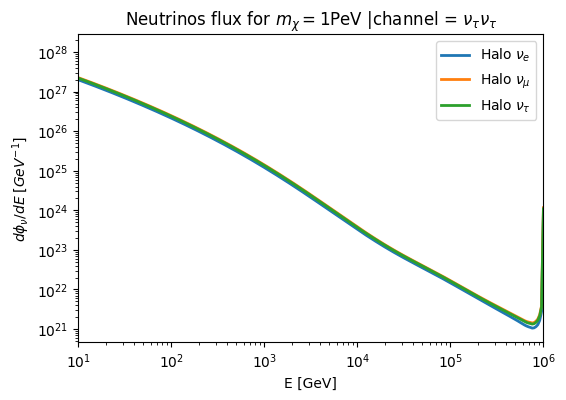

In [29]:
plt.figure(figsize = (6,4))
plt.title(r'Neutrinos flux for $m_{\chi} = 1$PeV |channel = $\nu_{\tau}\nu_{\tau}$')
plt.plot(mass_range,Flux_times_J_nutau_nue[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_e$')
plt.plot(mass_range,Flux_times_J_nutau_numu[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\mu}$')
plt.plot(mass_range,Flux_times_J_nutau_nutau[:,1],'-',linewidth=2.0,label=r'${\rm{Halo}}\;\nu_{\tau}$')
plt.yscale('log')
plt.grid()
plt.xlim(10,Emax)
plt.yscale('log')
plt.semilogx()
plt.grid()
plt.xlabel("E [GeV]")
plt.ylabel(r"$d\phi_\nu/dE\;[GeV^{-1}]$")
plt.legend()

theta = value_of_center - np.diff(theta)/2 - we want edges not bin centers

In [30]:
theta_edges = np.histogram_bin_edges(theta,bins=len(theta))
mass_range_edges = np.histogram_bin_edges(mass_range,bins=len(mass_range))

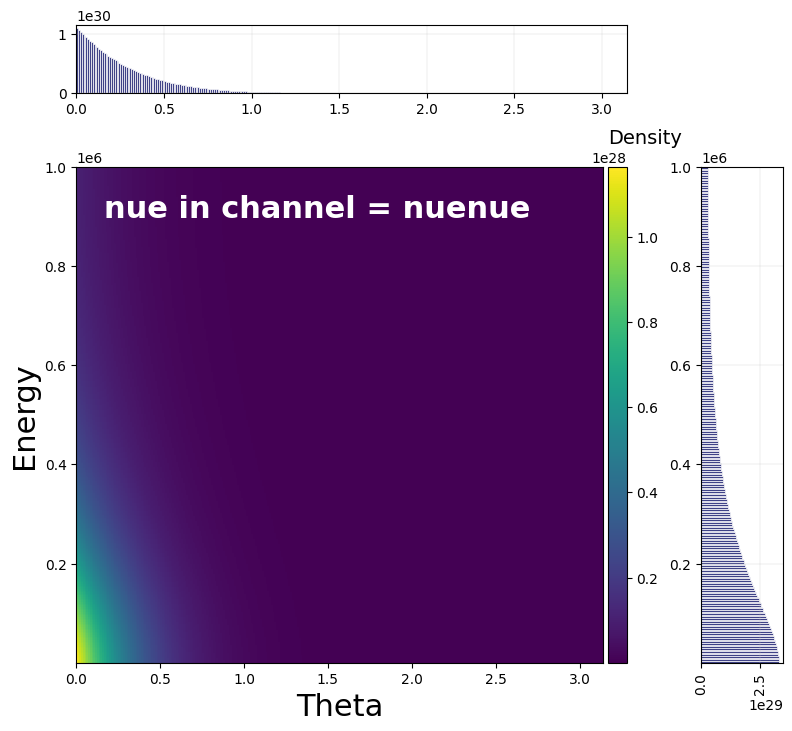

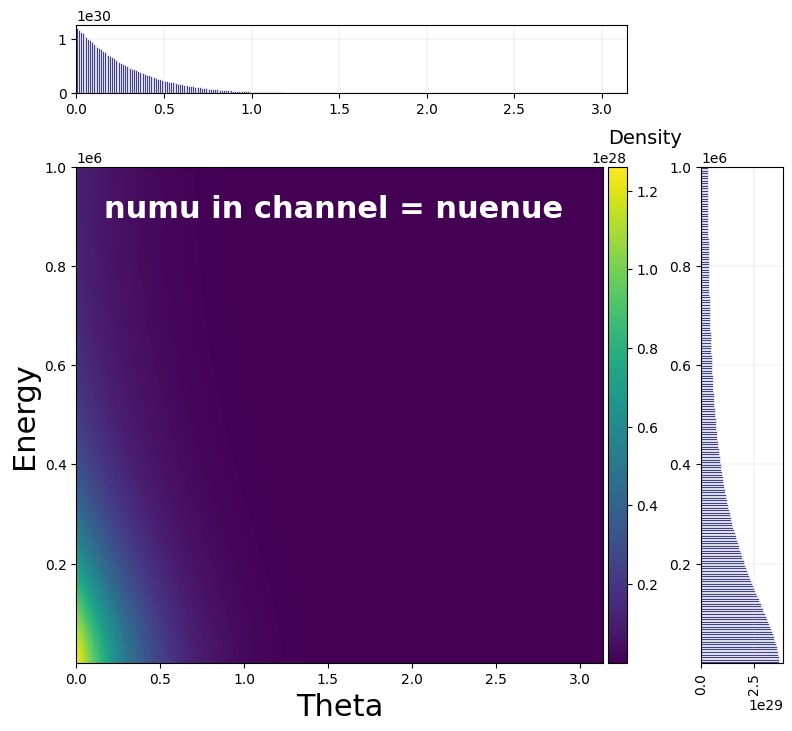

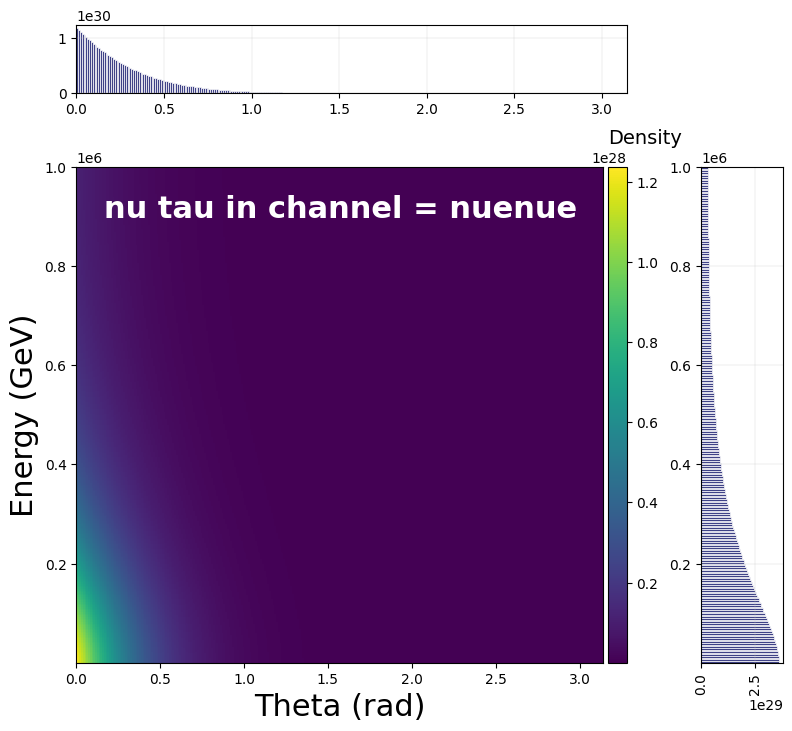

In [31]:
#nu_e channel
plot_projections(Flux_times_J_nue_nue,(theta_edges,mass_range_edges),'Theta','Energy','nue in channel = nuenue')
plot_projections(Flux_times_J_nue_numu,(theta_edges,mass_range_edges),'Theta','Energy','numu in channel = nuenue')
plot_projections(Flux_times_J_nue_nutau,(theta_edges,mass_range_edges),'Theta (rad)','Energy (GeV)','nu tau in channel = nuenue')

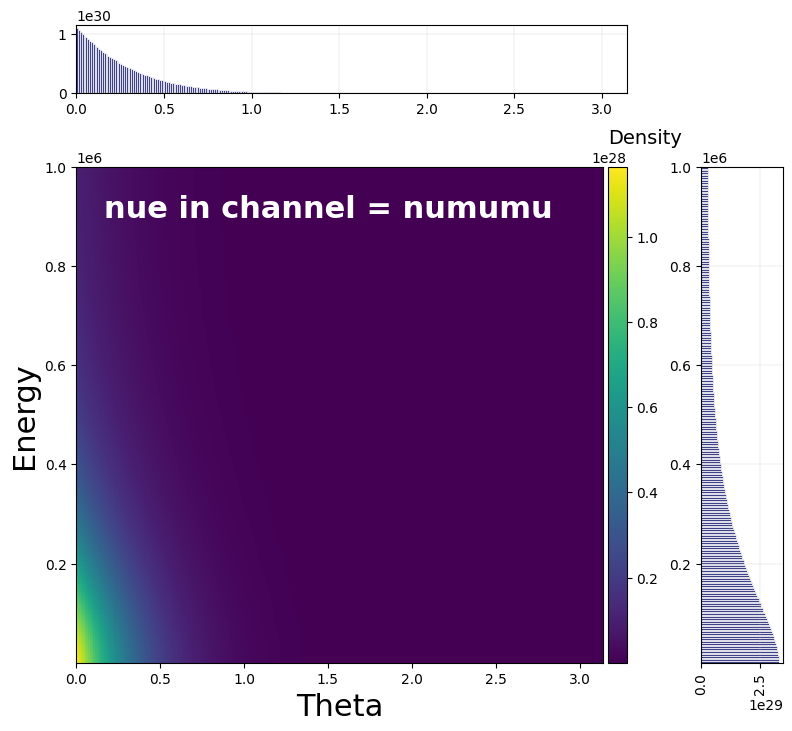

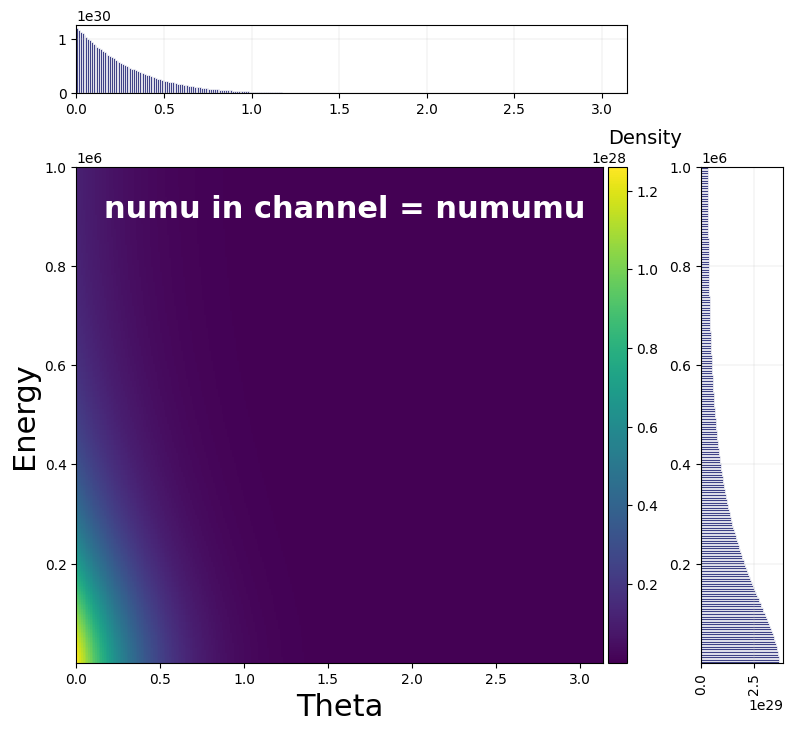

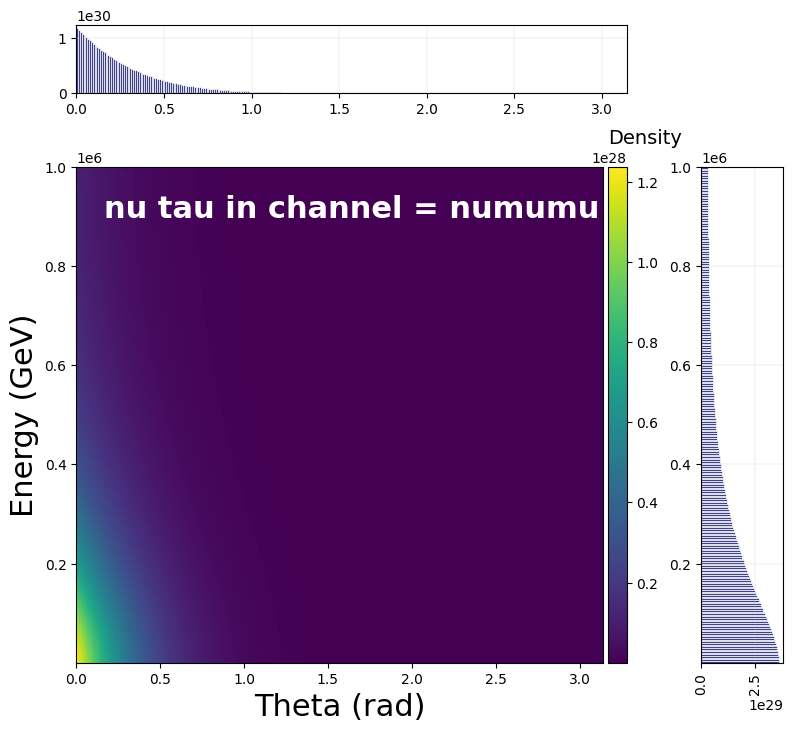

In [32]:
#nu_mu channel
plot_projections(Flux_times_J_numu_nue,(theta_edges,mass_range_edges),'Theta','Energy','nue in channel = numumu')
plot_projections(Flux_times_J_numu_numu,(theta_edges,mass_range_edges),'Theta','Energy','numu in channel = numumu')
plot_projections(Flux_times_J_numu_nutau,(theta_edges,mass_range_edges),'Theta (rad)','Energy (GeV)','nu tau in channel = numumu')

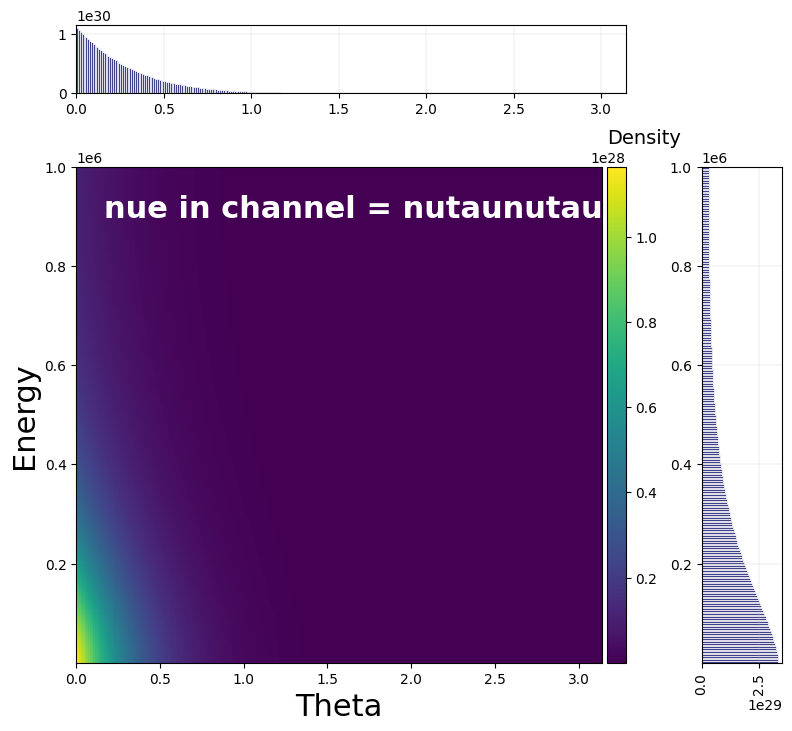

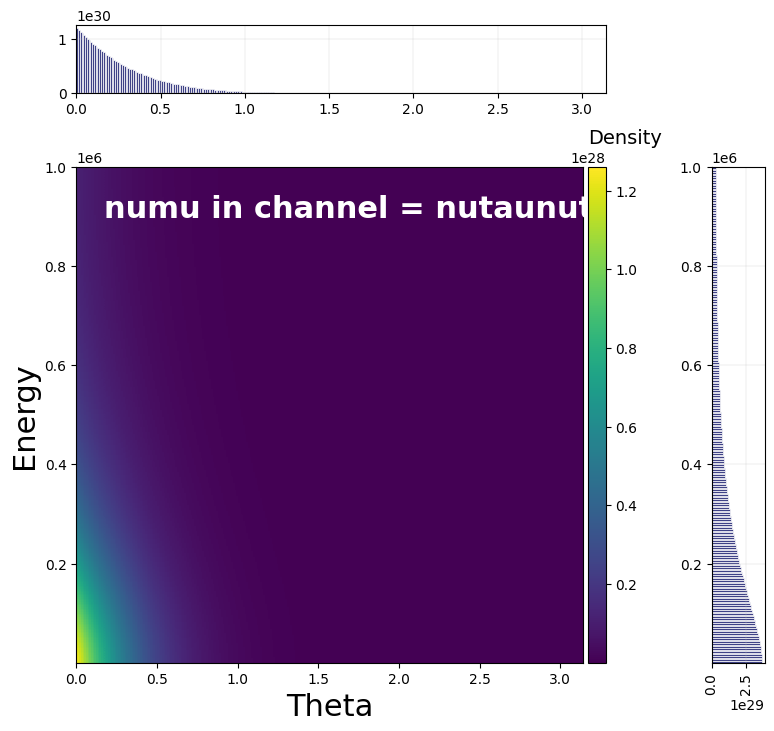

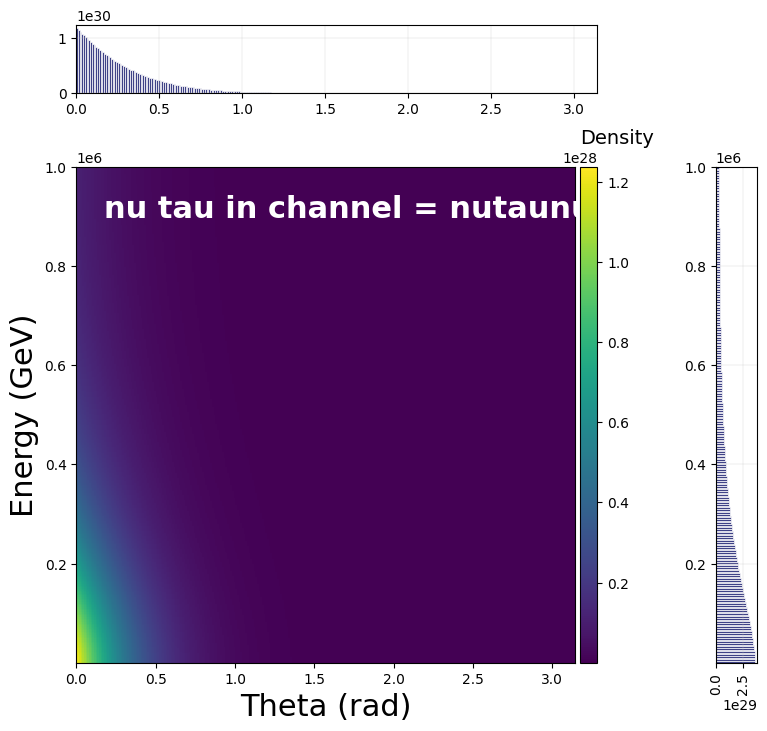

In [33]:
#nu_tau channel
plot_projections(Flux_times_J_nutau_nue,(theta_edges,mass_range_edges),'Theta','Energy','nue in channel = nutaunutau')
plot_projections(Flux_times_J_nutau_numu,(theta_edges,mass_range_edges),'Theta','Energy','numu in channel = nutaunutau')
plot_projections(Flux_times_J_nutau_nutau,(theta_edges,mass_range_edges),'Theta (rad)','Energy (GeV)','nu tau in channel = nutaunutau')

In [34]:
resp_matrix_data = np.load('./Resp_MC1122_logE.pkl',allow_pickle=True, encoding="latin1")

In [35]:
resp_matrix_data.keys()

dict_keys(['Bin', 'Resp', 'Resp_Scr'])

In [36]:
resp_matrix = resp_matrix_data['Resp']

In [37]:
resp_matrix.keys()

dict_keys(['nu_e', 'nu_mu', 'nu_tau', 'nu_e_bar', 'nu_mu_bar', 'nu_tau_bar'])

In [38]:
from scipy.interpolate import *

In [39]:
E_true = resp_matrix_data['Bin']['true_energy_center']
spectra = flux_ini_Halo_mu['nu_e']/mass
spectra_intp = scipy.interpolate.splrep(mass_range, spectra)
true_spec = scipy.interpolate.splev(E_true, spectra_intp, der=0)
plt.plot(E_true, true_spec, marker='+')
plt.semilogx()
plt.semilogy()

NameError: name 'scipy' is not defined